In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline
import seaborn as sns
origin = pd.read_csv('F:\Study\weiboPredict\data\WeiboProfile.train', 
                     sep='\001', 
                     encoding='utf-8',
                     quoting=3)
repo = pd.read_csv('F:\Study\weiboPredict\data\\trainRepost.txt', 
                   sep='\001', 
                   encoding='utf-8', 
                   quoting=3)
repo = repo.fillna(value='', axis=1)  # replace Na with empty string
print('origin: ', len(origin), '\n', 'repo: ', len(repo))

Populating the interactive namespace from numpy and matplotlib


origin:  26998 
 repo:  15975387


In [2]:
origin.head()

,w_id,author_id,time,content
0,3794305741726764,2724513,20:47:26,看到这条微博的人，羊年都会走大运！
1,3794545218812248,7460165,12:39:02,2015你最想获得下面那一项?
2,3794726233244929,7387806,00:38:19,从剧组偷了个闲出来认真的看过沙果“贱”入佳境了，幽默精彩，点赞支持👍，票房小黑马马力十足🐎祝...
3,3794986804085757,8091415,17:53:44,"Hey,从事教师这一职业的我不甘于现状，心中总有股劲儿想要挑战自己！一次偶然的机会让我接触了..."
4,3795261795455671,8189779,12:06:27,我操你们妈了隔壁[呵呵]


In [3]:
repo.head()

,w_id,from_id,repo_id,timestamp,content
0,3903741306239294,2848188,8381213,58674,
1,3972184907435086,5368578,8381203,53713,
2,3903069714925188,6854938,8381203,7828688,
3,3934248572099610,4130595,8381203,299103,
4,3945441579517170,7853791,8381203,11929,@空仕安forever @余瑞廉2013 @吴成军1982


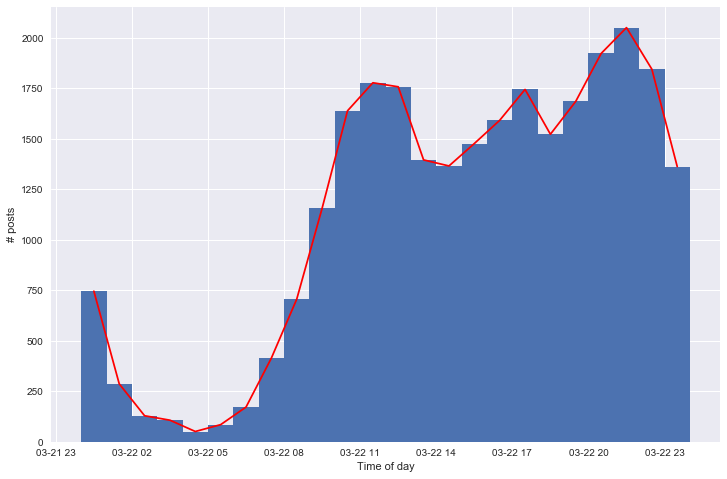

In [4]:
tt = origin.time  # the time column in the dataFrame
tt = pd.to_datetime(tt)  # transfer time column from string to TimeStamp class
plt.clf()  # clear the plot
fig = plt.figure(figsize=(12.0, 8.0))  # create a new figure
ax = fig.gca()  # i don't know actually
n_posts, bins, patches_posts = ax.hist(tt.dropna().values, bins=24)  # create hist for # posts of times in a day
ax.set_xlabel('Time of day')
ax.set_ylabel('# posts')
plt.plot([np.mean([bins[i], bins[i+1]]) for i in range(0, len(bins)-1)], n_posts, 'r-')
plt.show()  # show the plot in notebook

In [5]:
merged_repo = pd.merge(repo, origin, left_on=['w_id'], right_on=['w_id'], suffixes=['_repo','_origin'])
merged_repo.head()

,w_id,from_id,repo_id,timestamp,content_repo,author_id,time,content_origin
0,3903741306239294,2848188,8381213,58674,,6077791,20:25:17,请问@曹增辉 先生，新浪的立场是支持台独吗？如果是，可禁本帖销本号，也可封@黄安 的号。如果...
1,3903741306239294,6077791,8349183,4037,[怒],6077791,20:25:17,请问@曹增辉 先生，新浪的立场是支持台独吗？如果是，可禁本帖销本号，也可封@黄安 的号。如果...
2,3903741306239294,6869216,8347590,3398,[话筒],6077791,20:25:17,请问@曹增辉 先生，新浪的立场是支持台独吗？如果是，可禁本帖销本号，也可封@黄安 的号。如果...
3,3903741306239294,8296161,8343976,3636,新浪是日本人控股的，倭寇和台独是蛇鼠一窝,6077791,20:25:17,请问@曹增辉 先生，新浪的立场是支持台独吗？如果是，可禁本帖销本号，也可封@黄安 的号。如果...
4,3903741306239294,6869216,8343976,3483,→_→,6077791,20:25:17,请问@曹增辉 先生，新浪的立场是支持台独吗？如果是，可禁本帖销本号，也可封@黄安 的号。如果...


[  431457.   163254.    71803.    62661.    28526.    40868.    96385.
   217818.   394964.   703807.  1005721.  1085631.  1018129.   844863.
   798774.   837649.   897187.  1031865.   876639.   975701.  1170817.
  1233849.  1198443.   788576.]


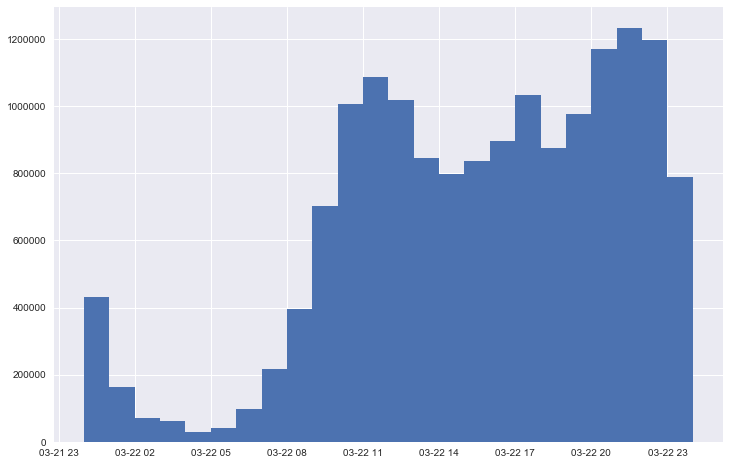

In [6]:
repo_of_time = merged_repo.time  # the time column in the dataFrame
repo_of_time = pd.to_datetime(repo_of_time)  # transfer time column from string to TimeStamp class
plt.clf()  # clear the plot
fig1 = plt.figure(figsize=(12.0, 8.0))  # create a new figure
ax1 = fig1.gca()  # i don't know actually
n_repos, bins, patches_repos = ax1.hist(repo_of_time.values, bins=24)  # create hist for # posts of times in a day
print(n_repos)

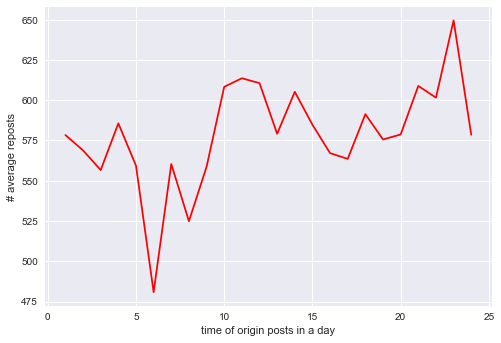

In [7]:
plt.clf()  # clear the plot
plt.plot([i for i in range(1, 25)], n_repos/n_posts, 'r-')
plt.ylabel('# average reposts')
plt.xlabel('time of origin posts in a day')
plt.show()  # show the plot in notebook

In [8]:
tt.ix[0]
tt.ix[0]+pd.Timedelta(111, 's')

Timestamp('2017-02-28 20:49:17')

In [4]:
# group the train repo data by w_id
grouped_repo = repo.groupby(['w_id'], as_index=True, sort=False)

In [5]:
repos_in_1h=pd.Series([(item['timestamp']<3600).sum() for id,item in grouped_repo])

Populating the interactive namespace from numpy and matplotlib
# of posts that its reposts less than 1: 

 2774


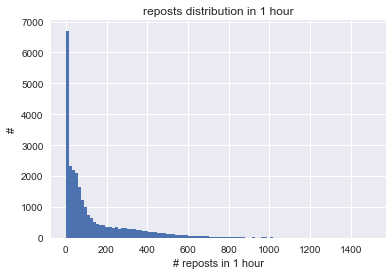

In [7]:
plt.clf()
repos_in_1h.hist(bins=100)
plt.xlabel('# reposts in 1 hour')
plt.ylabel('#')
plt.title('reposts distribution in 1 hour')
 
print('# of posts that its reposts less than 1: ',(repos_in_1h<1).sum())

w_id          3794305741726764
author_id              2724513
time                  20:47:26
content      看到这条微博的人，羊年都会走大运！
Name: 0, dtype: object
# reposts:  1021


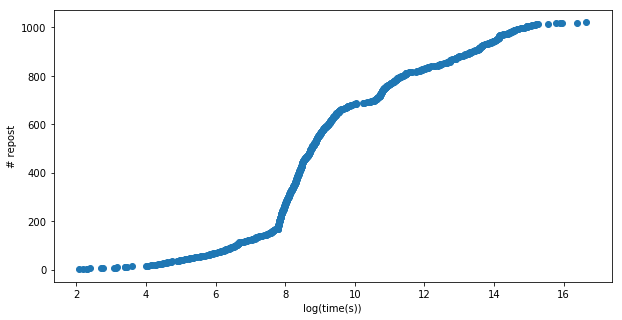

,w_id,from_id,repo_id,timestamp,content
2479481,3794305741726764,2724513,3727665,8,
9877061,3794305741726764,2724513,7110290,9,
4328307,3794305741726764,2724513,2635298,10,[心][心][心]
11422632,3794305741726764,2724513,7166775,10,
8350923,3794305741726764,2724513,6605029,11,轉發微博
136754,3794305741726764,2724513,7711589,15,
841067,3794305741726764,2724513,4103148,16,
13240405,3794305741726764,2724513,6139506,22,
165930,3794305741726764,2724513,7574112,23,Repost
14960506,3794305741726764,2724513,5457605,24,轉發微博


In [4]:
# origin_item = origin[origin.w_id==3804367189021699].iloc[0]
origin_item = origin.iloc[0]
# get the repo items of the first origin post
# and sorted by time from the origin
print(origin_item)
repo_items = grouped_repo.get_group(origin_item[0]).sort_values('timestamp')
 
print('# reposts: ',len(repo_items))
plt.clf()
fig3 = plt.figure(figsize=(10.0, 5.0))  # create a new figure
plt.scatter(np.log(repo_items.timestamp), range(1,len(repo_items)+1))
plt.xlabel('log(time(s))')
plt.ylabel('# repost')
plt.show()
repo_items